In [42]:
import numpy as np
import pandas as pd
import math as m
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.linalg import eig, eigh
from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import kneighbors_graph, NearestNeighbors
from sklearn.decomposition import KernelPCA, PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
import itertools

import scaleogram as scg
import matplotlib.pyplot as plt
import warnings

from visuals import *
from my_lib import *
from SSA_lib import SSA

In [2]:
warnings.simplefilter('ignore')

plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.unicode'] = True
plt.rcParams['figure.figsize'] = 5, 5
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 8

In [3]:
dt = 450*10
#data = pd.read_csv('data/long_walk_100_acc.csv', delimiter =';', decimal=',')[3815+6*455:3815+6*455+dt]
data = pd.read_csv('data/long_walk_100_acc.csv', delimiter =';', decimal=',')[7007:7007+dt]
#data = pd.read_csv('data/long_walk_100_acc.csv', delimiter =';', decimal=',')[3785:8000]
#data = pd.read_csv('data/home_lin_10_lac.csv', delimiter =';', decimal=',')[:]
frecuency = len(data)/(data['time'].values[-1]-data['time'].values[0])
assert 480 < frecuency < 520

x_acc = ( (data['X_value'].values)**2 + (data['Y_value'].values)**2 + (data['Z_value'].values)**2)**.5
_m = np.mean(x_acc)
x_acc -= _m
t = (data['time'].values).astype(float).reshape([-1,])
t = np.linspace(0,t[-1]-t[0],len(x_acc))

fig = go.Figure()
fig.add_scatter(y = x_acc, mode='lines', name='Sum squares')
fig.show()

In [4]:
accel_ssa = SSA(x_acc, 500)

x_acc_clear = accel_ssa.reconstruct(slice(0,5))

def HankelMatrix(X, L):  
    N = X.shape[0]
    return scipy.linalg.hankel(X[ : N - L + 1], X[N - L : N])

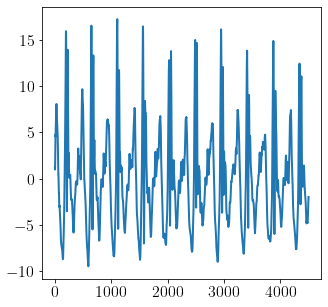

In [52]:
plt.plot(x_acc)

In [49]:
X = HankelMatrix(x_acc,500)

In [45]:
pca = PCA(n_components=4)
X_transformed = pca.fit_transform(X)

In [50]:
embedding = LocallyLinearEmbedding(n_components=4,
                                   n_neighbors=15,
                                   method = 'hessian')

X_transformed = embedding.fit_transform(X)

In [51]:
for index in itertools.combinations(np.arange(4),2):
    temp = X_transformed.copy()
    temp[:,index[0]] = (X_transformed[:,index[0]] + X_transformed[:,index[1]])/2
    x_projected = np.delete(temp,index[1],1)
    print(x_projected.shape)
    fig_2 = go.Figure()

    fig_2.add_trace(go.Scatter3d(x=x_projected[:,0],
                                 y=x_projected[:,1],
                                 z=x_projected[:,2],
                                 marker=dict(size=0.1,
                                             line=dict(width=0.01)
                                            ),
                                )
                    )


    fig_2.layout.template = 'plotly_white'
    fig_2.show()
    
    """fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_pojected[:,0],
            x_pojected[:,1],
            x_pojected[:,2],
            label='parametric curve')

    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.view_init(elev=20, azim=45)

    ax.grid(False)
    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    plt.show()"""


(4001, 3)


(4001, 3)


(4001, 3)


(4001, 3)


(4001, 3)


(4001, 3)
